In [18]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sns
from datetime import datetime

In [2]:
df = pd.read_excel(r'C:\Users\eywy0\Downloads\CreditCardFraud.xlsx')

In [20]:
df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,2.0,...,NAN,0.0,NAN,NAN,NAN,False,NAN,NAN,False,False
1,737265056,737265056,5000,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,9.0,...,NAN,0.0,NAN,NAN,NAN,True,NAN,NAN,False,False
2,737265056,737265056,5000,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,9.0,...,NAN,0.0,NAN,NAN,NAN,False,NAN,NAN,False,False
3,737265056,737265056,5000,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,9.0,...,NAN,0.0,NAN,NAN,NAN,False,NAN,NAN,False,False
4,830329091,830329091,5000,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,2.0,...,NAN,0.0,NAN,NAN,NAN,True,NAN,NAN,False,False


In [3]:
numV=['creditLimit', 'availableMoney', 'transactionAmount', 'currentBalance']

timV=['transactionDateTime', 'currentExpDate', 'accountOpenDate', 'dateOfLastAddressChange']

catV=['merchantName', 'acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode',
    'merchantCategoryCode', 'transactionType', 'cardPresent', 'expirationDateKeyInMatch']

spcV=['accountNumber', 'cardCVV', 'enteredCVV', 'cardLast4Digits']

missing={}

for col in df.columns:
    if df[col].isnull().values.any(): missing[col]=df[col].isnull().sum()

print(missing)
missing=['acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode', 'transactionType']

# len(df.loc[(df['posEntryMode']!=df['posEntryMode'])& (df['isFraud']==True)])

df = df.fillna('NAN')
# mf={}
# for miss in missing:
#     df.loc[(df[miss]!=df[miss]) & (df['isFraud']==True)].iloc[0][3] 

{'acqCountry': 4562, 'merchantCountryCode': 724, 'posEntryMode': 4054, 'posConditionCode': 409, 'transactionType': 698, 'echoBuffer': 786363, 'merchantCity': 786363, 'merchantState': 786363, 'merchantZip': 786363, 'posOnPremises': 786363, 'recurringAuthInd': 786363}


In [ ]:
# getting rid of duplicates/ nulls/ outliers

numset=['availableMoney','creditLimit','transactionAmount']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
c=0
for i in range(3):
    for j in range(i+1,3):
        x,y=df[numset[i]],df[numset[j]]
        axes[c].scatter(x, y)
        axes[c].set_xlabel(numset[i])
        axes[c].set_ylabel(numset[j])
        c+=1
        
plt.tight_layout()

In [ ]:
fig=df['currentBalance'].plot.kde()
fig.set_xlabel('currentBalance')

In [ ]:
df.groupby(['isFraud','acqCountry']).count()

In [ ]:
#Time VARs

dff=[pd._libs.tslibs.timestamps.Timestamp(df['transactionDateTime'][i]) for i in range(len(df['transactionDateTime']))]
df['transactionDateTime']=dff

for tt in timV:
    print(type(df[tt][3]))


In [25]:
#CVV 
def ham(a,b):
    mys='00'+str(100*(a//100!=b//100)+10*((a//10)%10!=(b//10)%10)+(a%10!=b%10))
    return mys[-3:]

df['CVVHD']=[ham(df['cardCVV'][i],df['enteredCVV'][i]) for i in range(len(df['cardCVV']))]
#df.drop(df['cardLast4Digits'])


In [26]:
#check if all CVV 3 dig
c=0
for i in range(len(df['enteredCVV'])):
    c+=0 if 0< df['cardCVV'][i]//100 <10 else 1


d=0
for i in range(len(df['cardLast4Digits'])):
    d+=0 if 0< df['cardLast4Digits'][i]//1000 <10 else 1
print('c: '+str(c)+' , d: '+str(d))

c: 0 , d: 110392


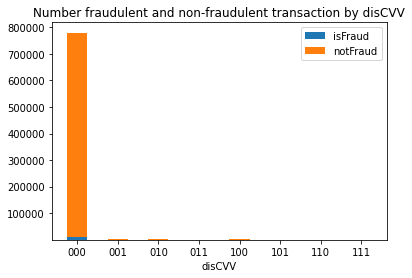

In [27]:
HD=sorted(list(set(df['CVVHD'])))
table=df.groupby(['CVVHD','isFraud']).count()
hdFraud={}
i=0
for hd in HD:
    hdFraud['isFraud']=hdFraud.get('isFraud',[])+[table.iloc[i+1,0]]
    hdFraud['notFraud']=hdFraud.get('notFraud',[])+[table.iloc[i,0]]
    i+=2
    
for h in hdFraud:
    hdFraud[h]=np.array(hdFraud[h])

width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(8)

for grp, num in hdFraud.items():
    p = ax.bar(HD, num, width, label=grp, bottom=bottom)
    bottom += num

ax.set_title("Number fraudulent and non-fraudulent transaction by disCVV")
ax.set_xlabel("disCVV")
ax.legend(loc="upper right")

plt.show()

In [ ]:
a=12214/(767134+12214)
b=(65+53+1+62+1+3)/(65+53+1+62+1+3+2049+2019+82+2043+68+60)
print(a)
print(b)

In [ ]:
# fig, ax = plt.subplots(figsize =(10, 7))
# ax.hist(, bins = [(df['transactionAmount'].max() - df['transactionAmount'].min())*(i/100) for i in range(101)])
# plt.xlabel("transactionAmount")
# plt.ylabel("number of transaction")
# plt.title("transactionAmount distribution")
# plt.
# plt.show()

fig, ax = plt.subplots(figsize=(12, 6))
sns.kdeplot(df['transactionAmount'],
            color='crimson', label='train', fill=True, ax=ax)
sns.kdeplot(data=np.random.exponential(100000, 700000),
            color='limegreen', label='valid', fill=True, ax=ax)
ax.legend()
plt.tight_layout()
plt.show()

In [ ]:
df.head()

In [5]:
df.groupby(['merchantCountryCode','isFraud']).count().reset_index()

,merchantCountryCode,isFraud,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,...,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch
0,CAN,False,2370,2370,2370,2370,2370,2370,2370,2370,...,2370,2370,2370,2370,2370,2370,2370,2370,2370,2370
1,CAN,True,56,56,56,56,56,56,56,56,...,56,56,56,56,56,56,56,56,56,56
2,MEX,False,3079,3079,3079,3079,3079,3079,3079,3079,...,3079,3079,3079,3079,3079,3079,3079,3079,3079,3079
3,MEX,True,64,64,64,64,64,64,64,64,...,64,64,64,64,64,64,64,64,64,64
4,NAN,False,642,642,642,642,642,642,642,642,...,642,642,642,642,642,642,642,642,642,642
5,NAN,True,82,82,82,82,82,82,82,82,...,82,82,82,82,82,82,82,82,82,82
6,PR,False,1532,1532,1532,1532,1532,1532,1532,1532,...,1532,1532,1532,1532,1532,1532,1532,1532,1532,1532
7,PR,True,27,27,27,27,27,27,27,27,...,27,27,27,27,27,27,27,27,27,27
8,US,False,766323,766323,766323,766323,766323,766323,766323,766323,...,766323,766323,766323,766323,766323,766323,766323,766323,766323,766323
9,US,True,12188,12188,12188,12188,12188,12188,12188,12188,...,12188,12188,12188,12188,12188,12188,12188,12188,12188,12188


In [6]:
varr=['merchantCountryCode', 'posEntryMode', 'posConditionCode',
    'merchantCategoryCode', 'transactionType']
b={}

# t=df.groupby(['merchantCategoryCode','isFraud']).count()
# dicc={}
# t = t.reset_index()
# myset=set(t['merchantCategoryCode'])

for var in varr:
    t=df.groupby([var,'isFraud']).count().reset_index()
    dic={}
    myset=set(t[var])
    for s in myset:
        if len(t.loc[(t[var] == s)])==2:
            true,false=t.loc[(t[var] == s) & (t['isFraud']==True)].iloc[0][3], t.loc[(t[var] == s) & (t['isFraud']==False)].iloc[0][3]
            dic[s]=true/(true+false)
        else:
            dic[s]=0
    b[var]=dic
    
b

{'merchantCountryCode': {'MEX': 0.02036271078587337,
  'PR': 0.01731879409878127,
  'NAN': 0.1132596685082873,
  'US': 0.01565552702530857,
  'CAN': 0.023083264633140973},
 'posEntryMode': {2.0: 0.017459961007277962,
  5.0: 0.007795959179138826,
  9.0: 0.02393004089123439,
  80.0: 0.015703723091016163,
  'NAN': 0.06635421805624075,
  90.0: 0.0190028606456886},
 'posConditionCode': {8.0: 0.01293823596241496,
  1.0: 0.01626942032834648,
  'NAN': 0.05378973105134474,
  99.0: 0.030399575202442585},
 'merchantCategoryCode': {'entertainment': 0.011997802691702664,
  'food_delivery': 0,
  'subscriptions': 0.009431902537007118,
  'food': 0.013432242681149821,
  'fastfood': 0.009577484884695642,
  'online_subscriptions': 0,
  'airline': 0.034648325979756034,
  'health': 0.004714016341923318,
  'auto': 0.012609117361784675,
  'personal care': 0.004534908247205231,
  'furniture': 0.013858988159311088,
  'mobileapps': 0,
  'cable/phone': 0,
  'hotels': 0.007332023345162331,
  'rideshare': 0.024874

In [7]:
pd.DataFrame.from_dict(b)

,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,transactionType
MEX,0.020363,NaN,NaN,NaN,NaN
PR,0.017319,NaN,NaN,NaN,NaN
NAN,0.113260,0.066354,0.053790,NaN,0.020057
US,0.015656,NaN,NaN,NaN,NaN
CAN,0.023083,NaN,NaN,NaN,NaN
2.0,NaN,0.017460,NaN,NaN,NaN
5.0,NaN,0.007796,NaN,NaN,NaN
9.0,NaN,0.023930,NaN,NaN,NaN
80.0,NaN,0.015704,NaN,NaN,NaN
90.0,NaN,0.019003,NaN,NaN,NaN


In [8]:
# tran type condition on catVar

varrr=['merchantCountryCode']

bcon={}
trans=set(df['transactionType'])

for var in varrr:
    t=df.groupby([var,'transactionType','isFraud']).count().reset_index()
    vtdic={}
    myset=set(t[var])
    for s in myset:
        tdic={}
        for tran in trans:
            if len(t.loc[(t[var] == s) & (t['transactionType'] == tran)])==2:
                true,false=t.loc[(t[var] == s) & (t['transactionType'] == tran) & (t['isFraud']==True)].iloc[0][3], t.loc[(t[var] == s) & (t['transactionType'] == tran) & (t['isFraud']==False)].iloc[0][3]
                tdic[tran]=true/(true+false)
            else:
                tdic[tran]=0
        vtdic[s]=tdic
    bcon=vtdic
    
pd.DataFrame.from_dict(bcon).transpose()

,REVERSAL,NAN,PURCHASE,ADDRESS_VERIFICATION
MEX,0.000000,0.000000,0.021578,0.000000
PR,0.000000,0.000000,0.018219,0.000000
NAN,0.150000,0.000000,0.114826,0.000000
US,0.016482,0.018923,0.015897,0.005805
CAN,0.040000,0.333333,0.022628,0.000000


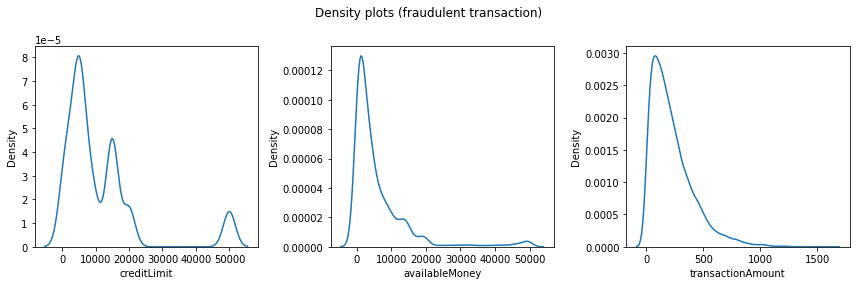

In [9]:
numV=['creditLimit', 'availableMoney', 'transactionAmount']
    
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(12, 4))
LOC=[[0,0],[0,1],[0,2]]
for i in range(3):
    sns.kdeplot(df.loc[(df['isFraud']==True)][numV[i]],ax=axes[i])
    
    
fig.suptitle('Density plots (fraudulent transaction)')
plt.tight_layout()

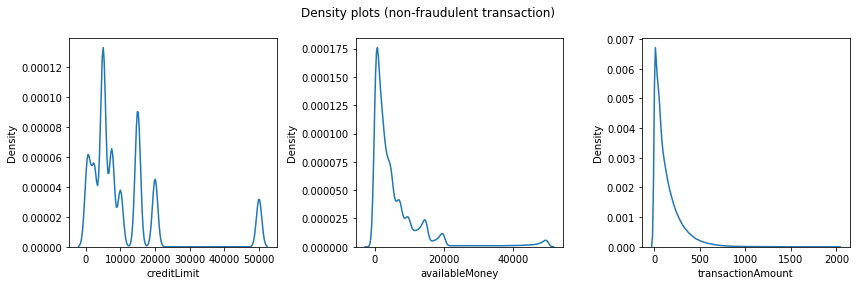

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(12, 4))
LOC=[[0,0],[1,0],[0,1],[1,1]]
for i in range(3):
    sns.kdeplot(df.loc[(df['isFraud']==False)][numV[i]],ax=axes[i])
    
    
fig.suptitle('Density plots (non-fraudulent transaction)')
plt.tight_layout()

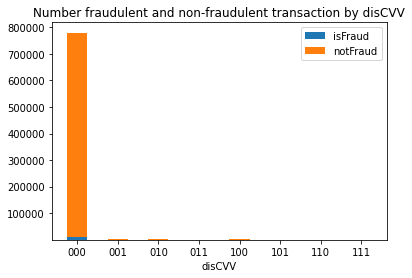

In [28]:
# multi-swipe

# Programmatically identify multi-swipe transactions by defining specific conditions under which they occur (e.g., same amount, within a short time 
# span, etc.). Clearly state the conditions you have chosen for this analysis. Estimate the percentage of multi-swipe transactions and the percentage 
# of the total dollar amount for these transactions, excluding the first "normal" transaction from the count. Discuss any interesting findings or 
# patterns that emerge from your analysis of multi-swipe transactions and their conditions

ms=[0]

for i in range(1,len(df.iloc[:,0])):
    added=False
    if df['accountNumber'][i]==df['accountNumber'][i-1]:
        if df['transactionAmount'][i]==df['transactionAmount'][i-1]:
            form='%Y-%m-%d %H:%M:%S'
            dt1, dt2=datetime.strptime(df['transactionDateTime'][i].replace('T',' '), form),datetime.strptime(df['transactionDateTime'][i-1].replace('T',' '), form)
            if dt1-dt2< pd.Timedelta(5,unit='m'):
                ms.append(1)
                added=True
    if added==False:
        ms.append(0)
        
df["multiswipe"]=ms

tim=df.groupby(['isFraud','multiswipe']).count()

width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(8)

for grp, num in hdFraud.items():
    p = ax.bar(HD, num, width, label=grp, bottom=bottom)
    bottom += num

ax.set_title("Number fraudulent and non-fraudulent transaction by disCVV")
ax.set_xlabel("disCVV")
ax.legend(loc="upper right")

plt.show()

In [29]:
msfamt=sum([df['transactionAmount'][i] for i in range(1,len(df.iloc[:,0])) if df['multiswipe'][i] and df['isFraud'][i] ])
msamt=sum([df['transactionAmount'][i] for i in range(1,len(df.iloc[:,0])) if df['multiswipe'][i]])
famt=sum([df['transactionAmount'][i] for i in range(1,len(df.iloc[:,0])) if df['isFraud'][i]])

msfnt=sum([1 for i in range(1,len(df.iloc[:,0])) if df['multiswipe'][i] and df['isFraud'][i] ])
msnt=sum([1 for i in range(1,len(df.iloc[:,0])) if df['multiswipe'][i]])
fnt=sum([1 for i in range(1,len(df.iloc[:,0])) if df['isFraud'][i]])

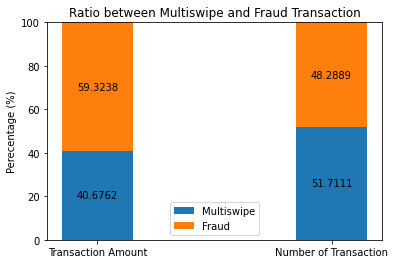

In [36]:
bars = ['Transaction Amount', 'Number of Transaction']
data_set = {
    'Multiswipe': np.array([100*msamt/(msamt+famt), 100*msnt/(fnt+msnt)]),
    'Fraud': np.array([100*famt/(msamt+famt), 100*fnt/(fnt+msnt)]),
}
width = 0.3  # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()
bottom = np.zeros(2)

for bar_name, data in data_set.items():
    p = ax.bar(bars, data, width, label=bar_name, bottom=bottom)
    bottom += data

    ax.bar_label(p, label_type='center')

ax.set(ylabel='Perecentage (%)', title='Ratio between Multiswipe and Fraud Transaction', ylim=(0, 100))
ax.legend()
plt.show()


[Text(0, 0, '2.72867'), Text(0, 0, '1.87095')]

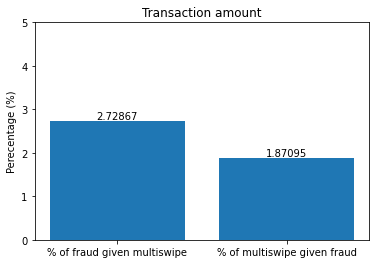

In [34]:
bars = ['% of fraud given multiswipe', '% of multiswipe given fraud']
data = [(msfamt/msamt)*100,100*(msfamt/famt)]

fig, ax = plt.subplots()
bar_container = ax.bar(bars, data)
ax.set(ylabel='Perecentage (%)', title='Transaction amount', ylim=(0, 5))
ax.bar_label(bar_container)

[Text(0, 0, '1.72971'), Text(0, 0, '1.8523')]

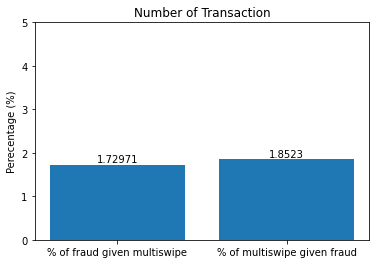

In [35]:
bars = ['% of fraud given multiswipe', '% of multiswipe given fraud']
data = [(msfnt/msnt)*100,100*(msfnt/fnt)]

fig, ax = plt.subplots()
bar_container = ax.bar(bars, data)
ax.set(ylabel='Perecentage (%)', title='Number of Transaction', ylim=(0, 5))
ax.bar_label(bar_container)

In [ ]:
#mitigate class imbalance

df.groupby(['isFraud']).count()


In [ ]:
countT=df[df['isFraud']==False].groupby(['accountNumber'])
NumnonFraud=countT.ngroups
NumnonFraud
# df.groupby(['isFraud'=True,'accountNumber'])

In [ ]:
countT=df['accountNumber']


In [ ]:
rus=RandomUnderSampler(random_state=0)
X=df.drop("isFraud",axis=1)
y=df["isFraud"]
X_resampled, y_resampled = rus.fit_resample(X,y)
y_resampled.value_counts()